In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from warnings import filterwarnings
filterwarnings('ignore')

In [11]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [12]:
## Gradient Boosting Machines
from sklearn.ensemble import GradientBoostingRegressor

In [13]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)



GradientBoostingRegressor()

In [14]:
## Tahmin
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

349.4446084628948

In [15]:
## Model Tuning
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [16]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=1; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.5; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=200, subsample=0.5; total time=   

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [20]:
gbm_cv_model.best_params_

{'learning_rate': 0.2, 'max_depth': 50, 'n_estimators': 200, 'subsample': 0.5}

In [29]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.2,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [30]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

328.2935301269839

In [31]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

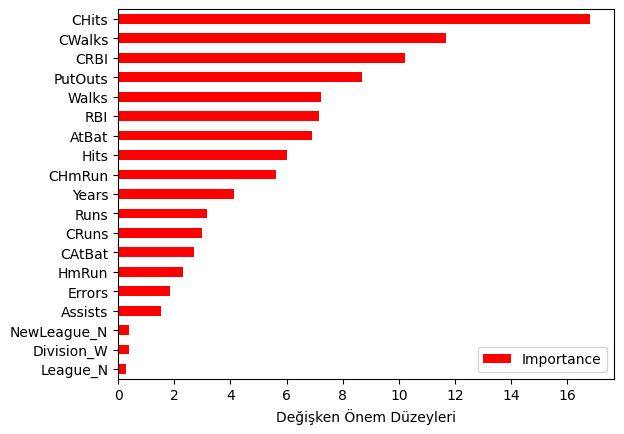

In [32]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")